# Data Display

This is our final visualization notebook used to show results for each model on all of the datasets, as well as their aggregate results across all datasets (averaged) to compare all modeling approaches in a single figure.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import numpy as np
plt.rcParams['figure.figsize'] = (16, 12)

In [14]:
def parse_data(filename):
    with open(filename, "r") as f:
        text = f.readlines()
        cur_df = []
        for line in text:
            model_type = ""

            for count, token in enumerate(line.split(" | ")):
                token = token.strip()
                sub_tokens = token.split(": ")
                if count == 0:
                    model_type = sub_tokens[0]
                else:
                    cur_df.append({"Metric":sub_tokens[0], "Value": sub_tokens[1], "Model Name" : model_type, "Dataset":filename.split("/")[-1].split(".")[0]})

    df = pd.DataFrame(cur_df)
    return df

In [15]:
filename = "final_outputs/report_covid-abstracts_synonym.txt"

In [16]:
os.getcwd()

'C:\\Users\\Joshua\\Desktop\\InformationRetrievalRanking'

In [17]:
os.chdir("final_outputs/")
files = glob.glob("*.txt")
print(files)

df = parse_data(files[0])

for file in files[1:]:
    df_temp = parse_data(file)
    df = pd.concat([df, df_temp])

['report_covid-abstracts_none.txt', 'report_covid-abstracts_synonym.txt', 'report_news-aggregator_none.txt', 'report_news-aggregator_synonym.txt', 'report_walmart-amazon_none.txt', 'report_walmart-amazon_synonym.txt']


In [18]:
print(df.describe())

       Metric Value Model Name                      Dataset
count     294   294        294                          294
unique      7   219          7                            6
top     Top 1   1.0     Random  report_covid-abstracts_none
freq       42    15         42                           49


In [19]:
print(df.dtypes)
df = df.astype({"Value": np.float32})
df

Metric        object
Value         object
Model Name    object
Dataset       object
dtype: object


,Metric,Value,Model Name,Dataset
0,Top 1,0.001000,Random,report_covid-abstracts_none
1,Top 3,0.001500,Random,report_covid-abstracts_none
2,Top 5,0.002500,Random,report_covid-abstracts_none
3,Top 10,0.004000,Random,report_covid-abstracts_none
4,Top 25,0.014500,Random,report_covid-abstracts_none
...,...,...,...,...
44,Top 5,0.991379,SPLADE,report_walmart-amazon_synonym
45,Top 10,0.995690,SPLADE,report_walmart-amazon_synonym
46,Top 25,1.000000,SPLADE,report_walmart-amazon_synonym
47,Top 50,1.000000,SPLADE,report_walmart-amazon_synonym


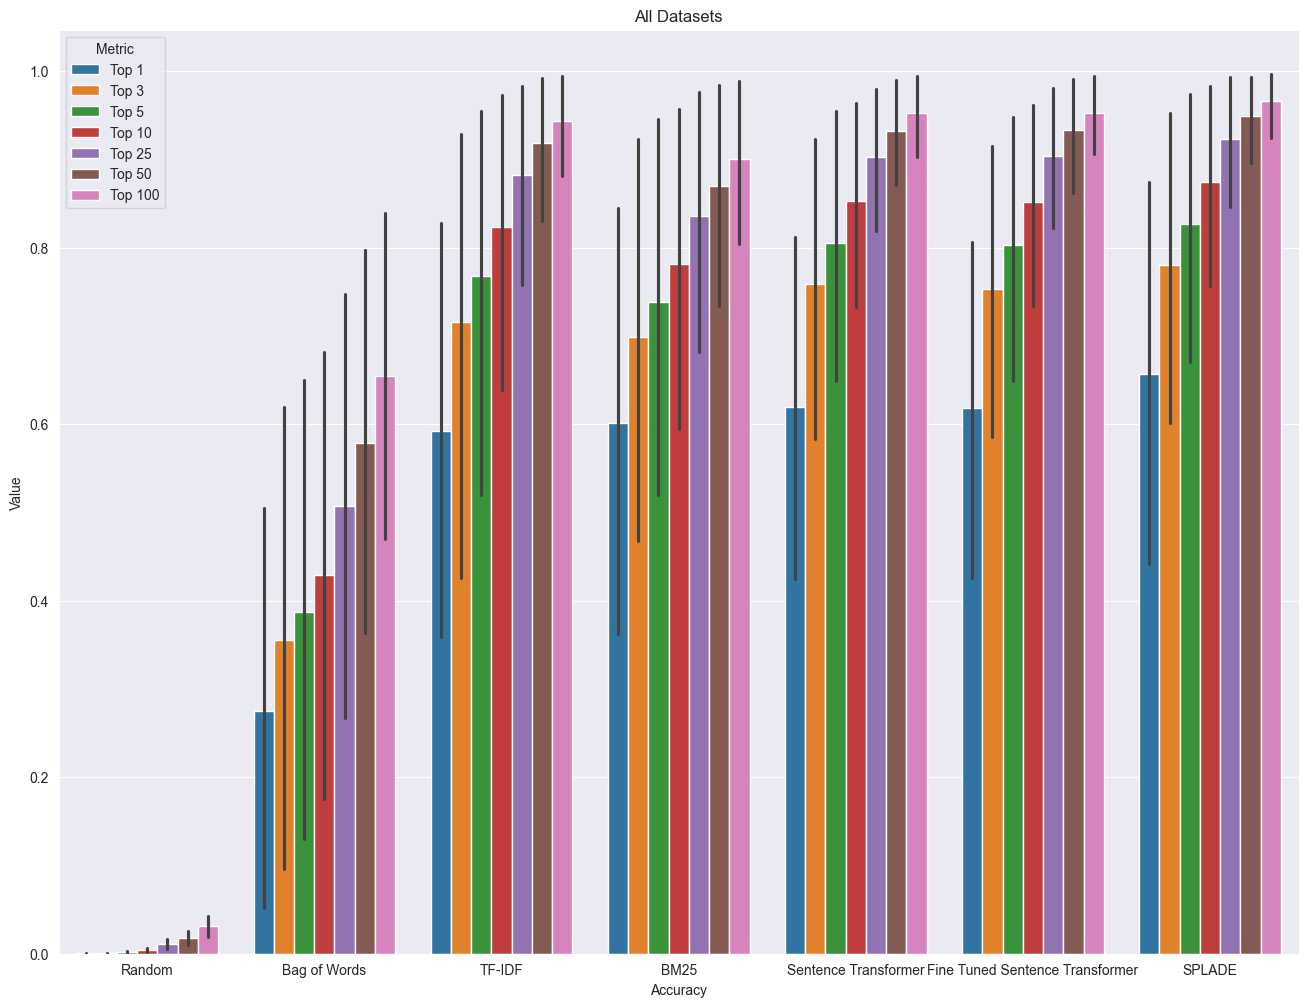

In [20]:
barplot = sns.barplot(df, x="Model Name", y="Value", hue="Metric")
plt.title("All Datasets")
plt.xlabel("Accuracy")
plt.show()

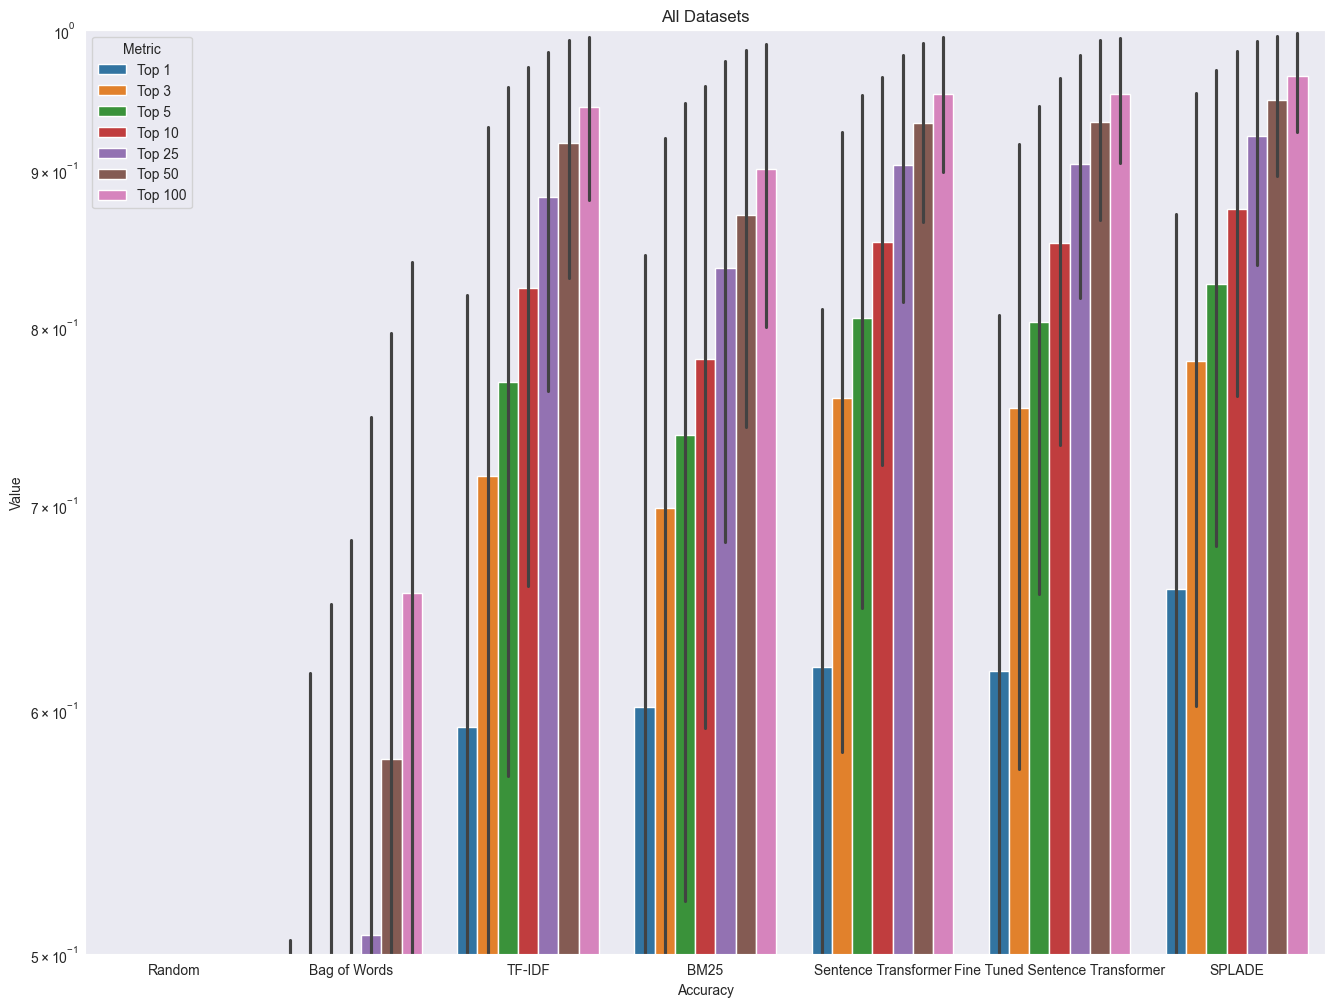

In [45]:
barplot = sns.barplot(df, x="Model Name", y="Value", hue="Metric")
plt.title("All Datasets")
plt.xlabel("Accuracy")
plt.ylim(0.5, 1.0)
plt.show()


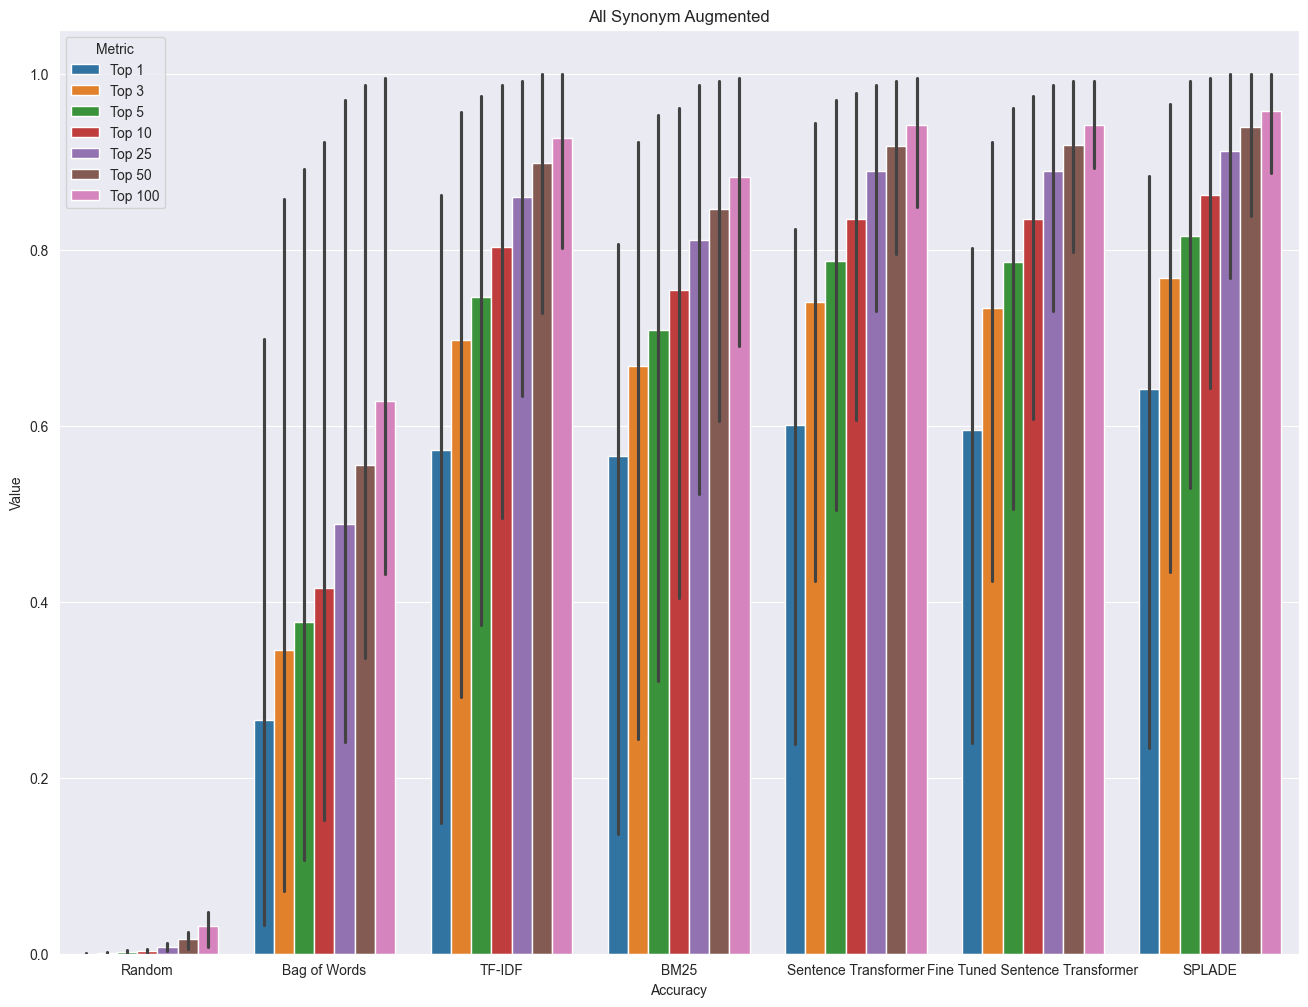

In [21]:
df_syn = df[df['Dataset'].str.contains("syn")]
plt.title("All Synonym Augmented")
plt.xlabel("Accuracy")
barplot_syn = sns.barplot(df_syn, x="Model Name", y="Value", hue="Metric")

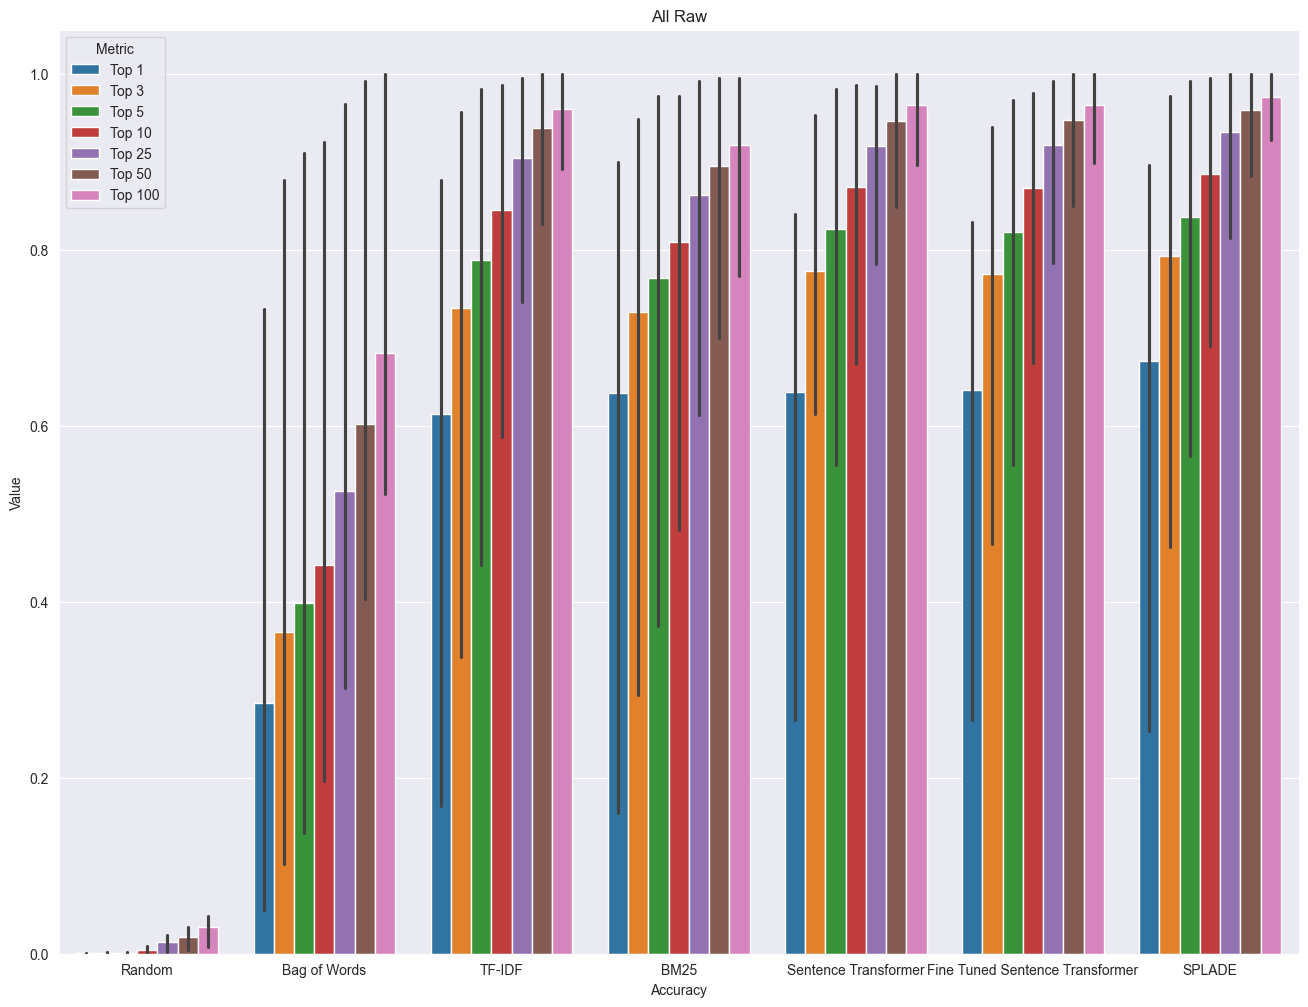

In [22]:
df_none = df[df['Dataset'].str.contains("none")]
plt.title("All Raw")
plt.xlabel("Accuracy")
barplot_none = sns.barplot(df_none, x="Model Name", y="Value", hue="Metric")

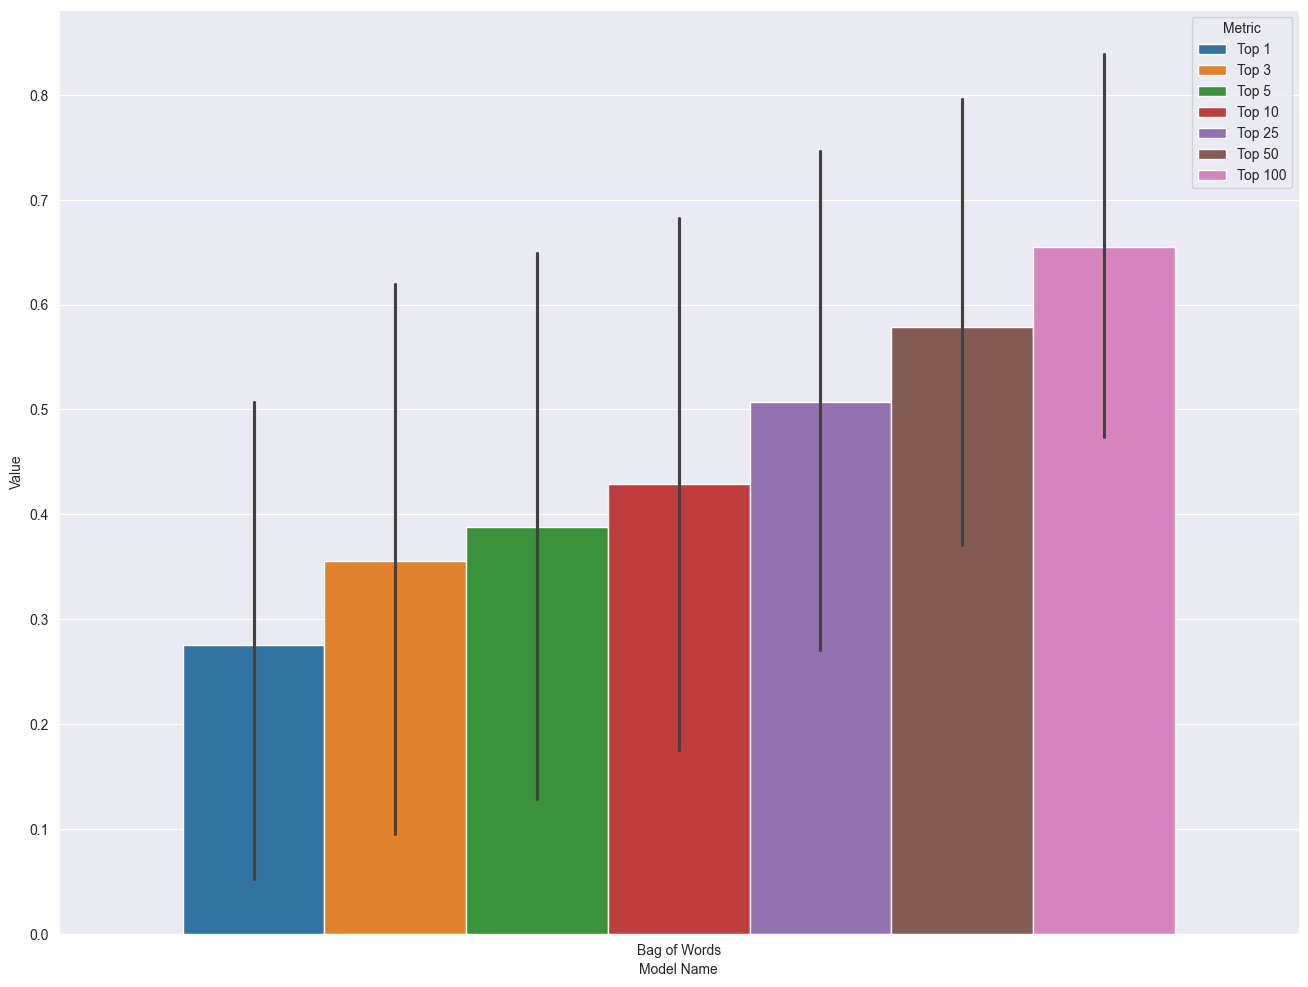

In [23]:
df_bow_v1 = df[df['Model Name'].str.contains("Words")]
barplot_bow_v1 = sns.barplot(df_bow_v1, x="Model Name", y="Value", hue="Metric")
plt.show()

In [39]:
def generate_plot_v1(df, model_name, title, exact=False):
    if exact:
        df_v1 = df[(df['Model Name'].str.strip() == model_name) & (df['Metric'].str.contains("1") | (df['Metric'].str.contains("Top 5") & ~df['Metric'].str.contains("50")))]
    else:
        df_v1 = df[df['Model Name'].str.contains(model_name) & (df['Metric'].str.contains("1") | (df['Metric'].str.contains("Top 5") & ~df['Metric'].str.contains("50")))]
    plt.xlabel("Accuracy")
    plt.title(title)
    barplot_v1 = sns.barplot(df_v1, x="Dataset", y="Value", hue="Metric")
    plt.show()

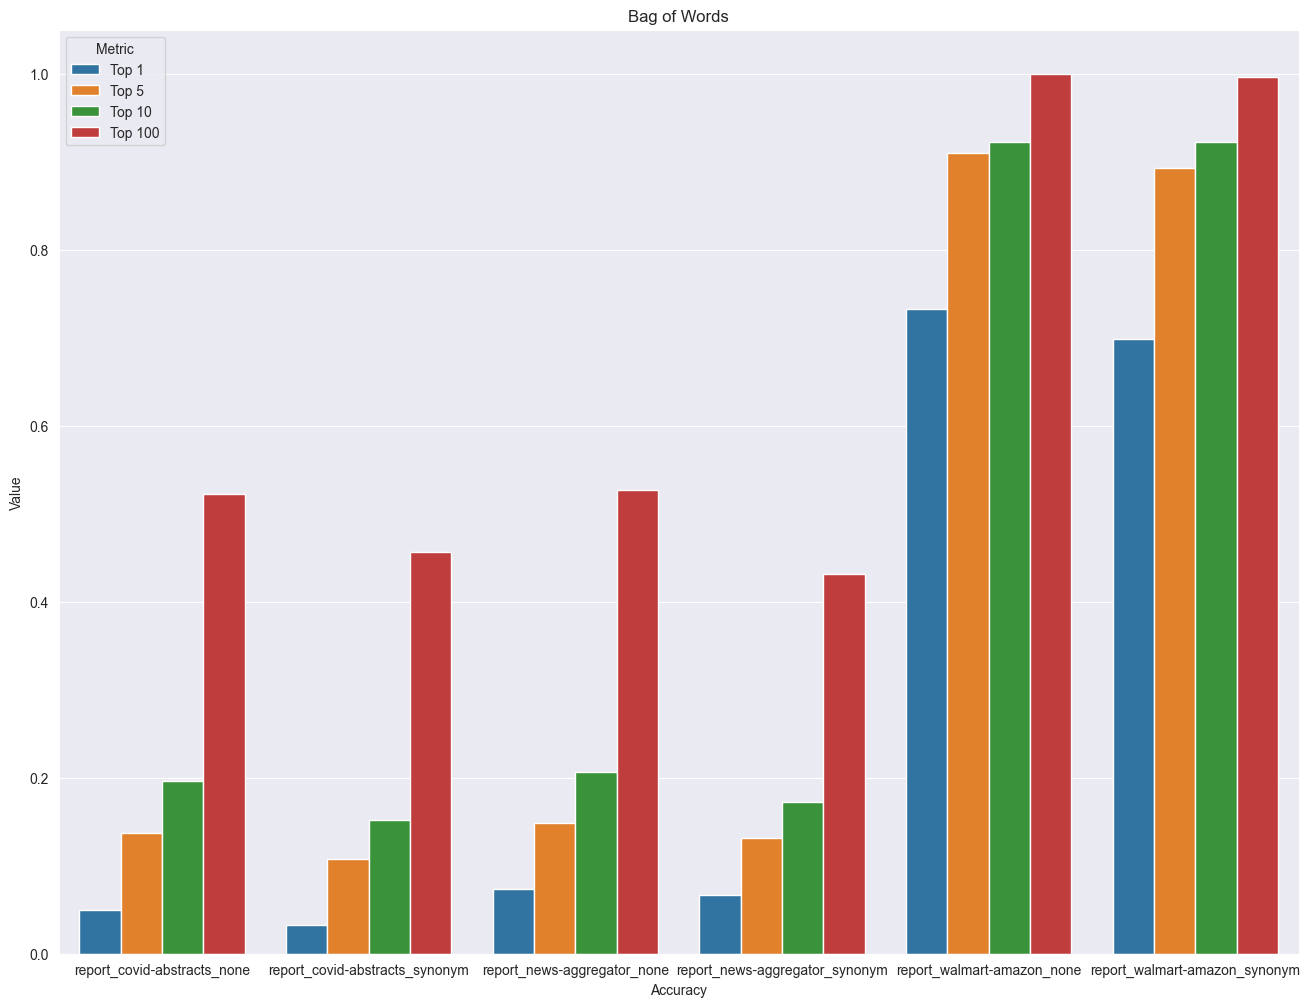

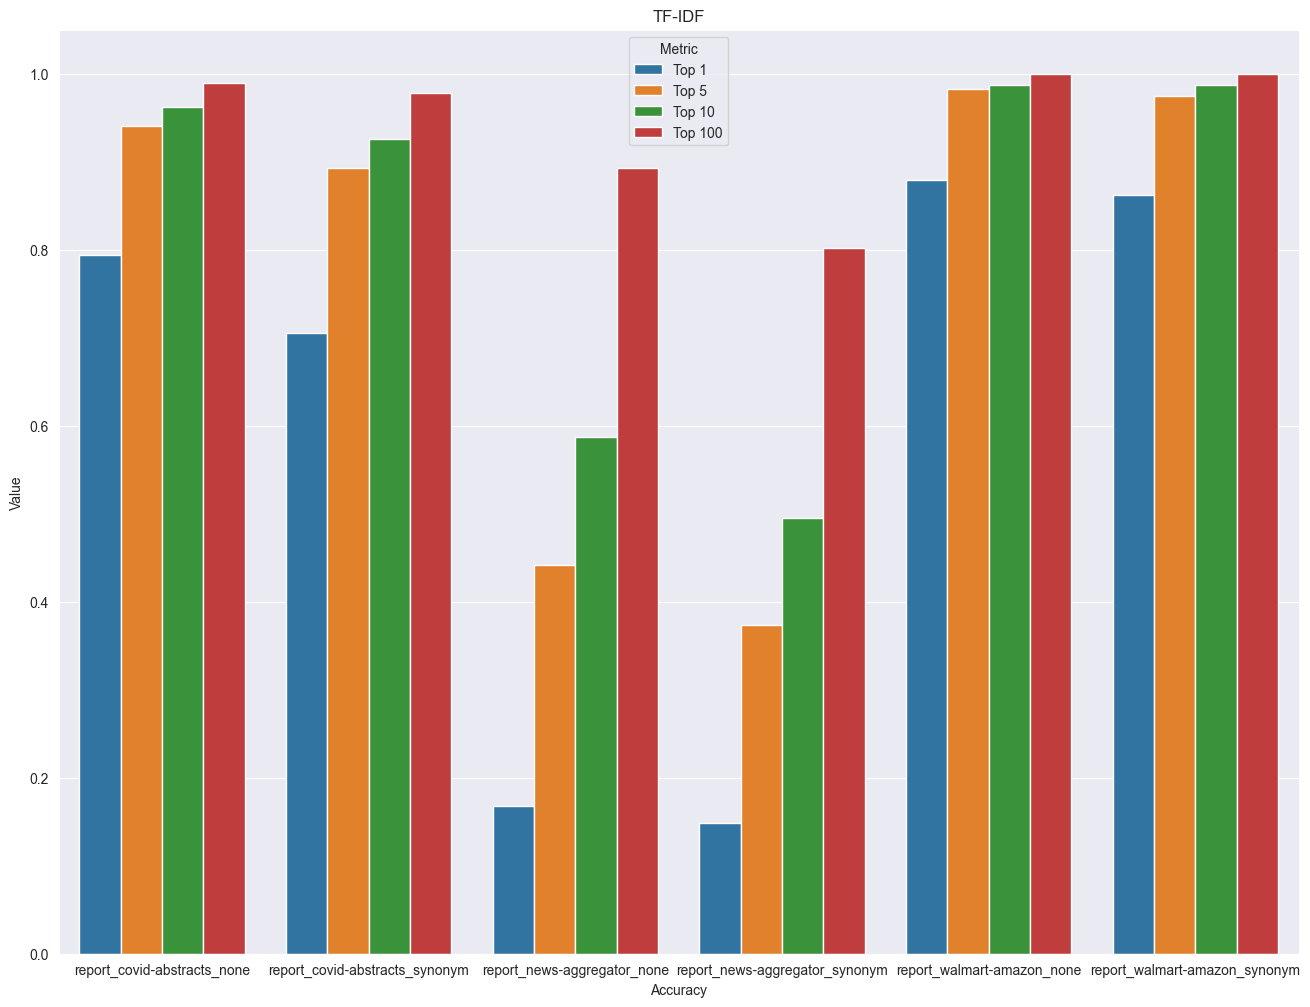

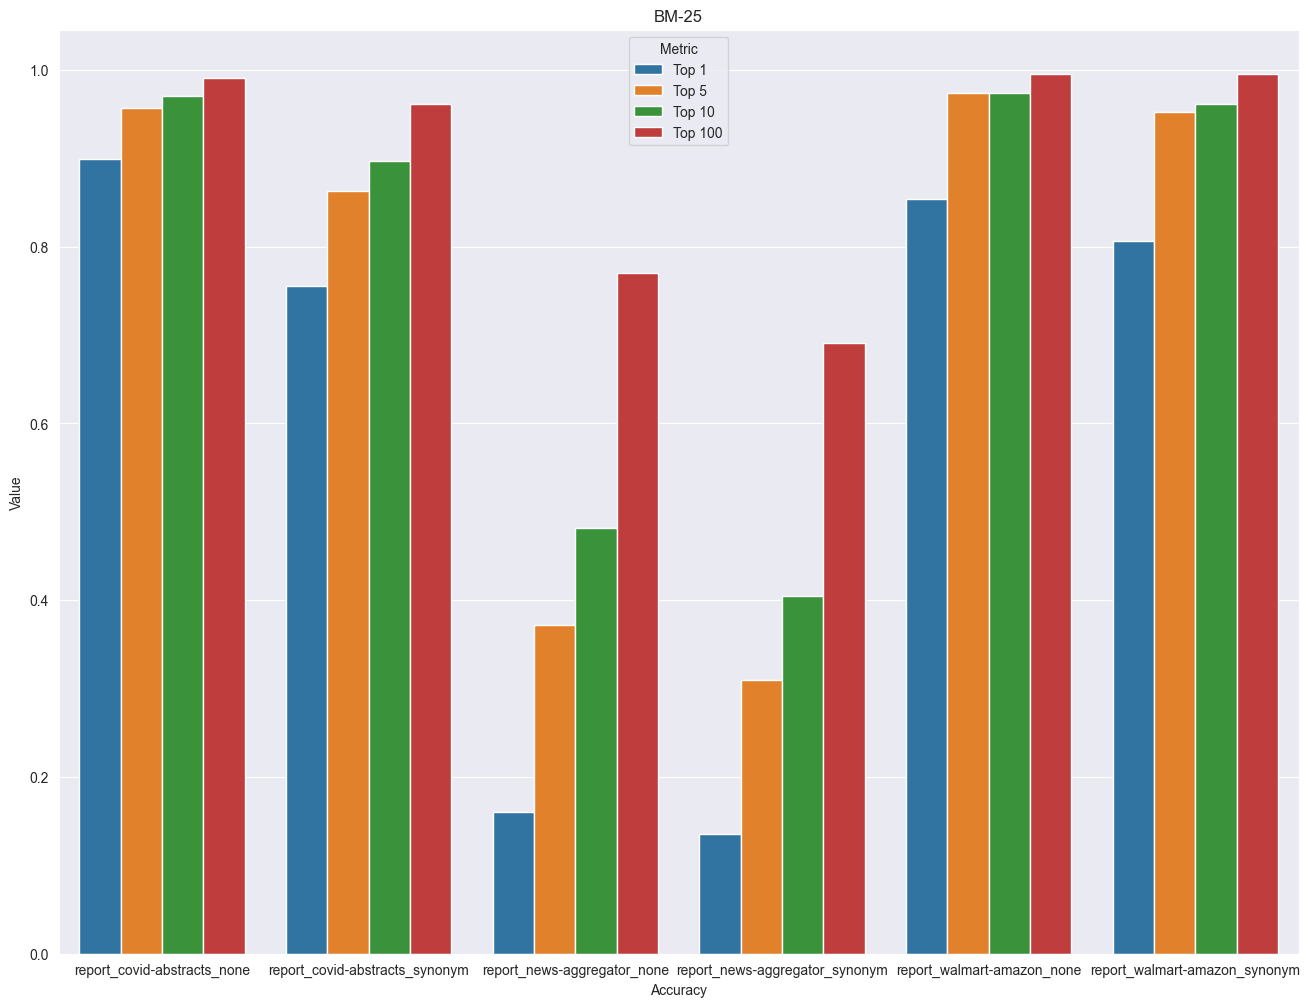

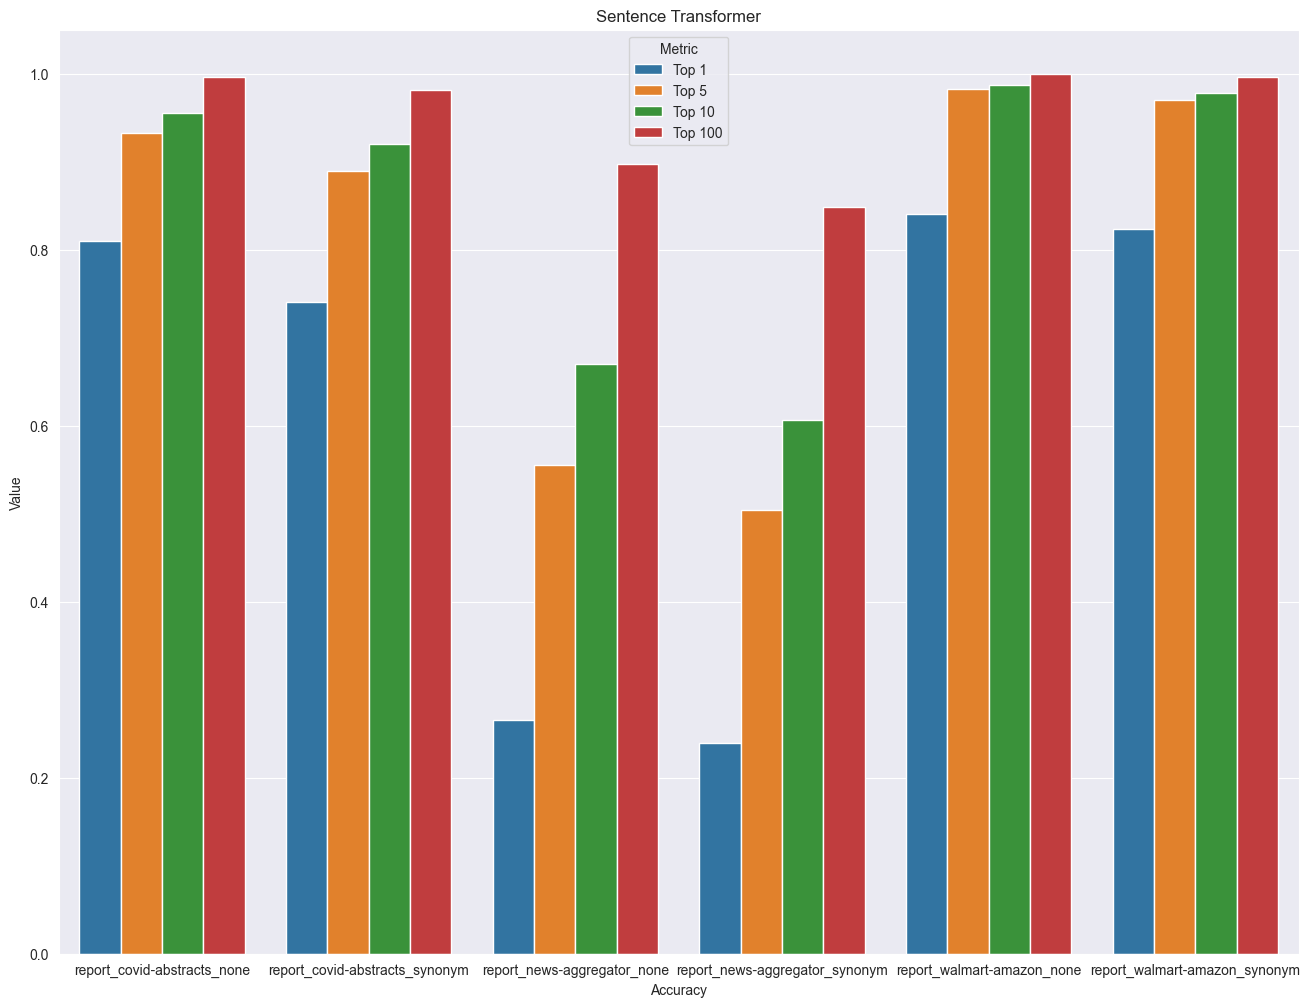

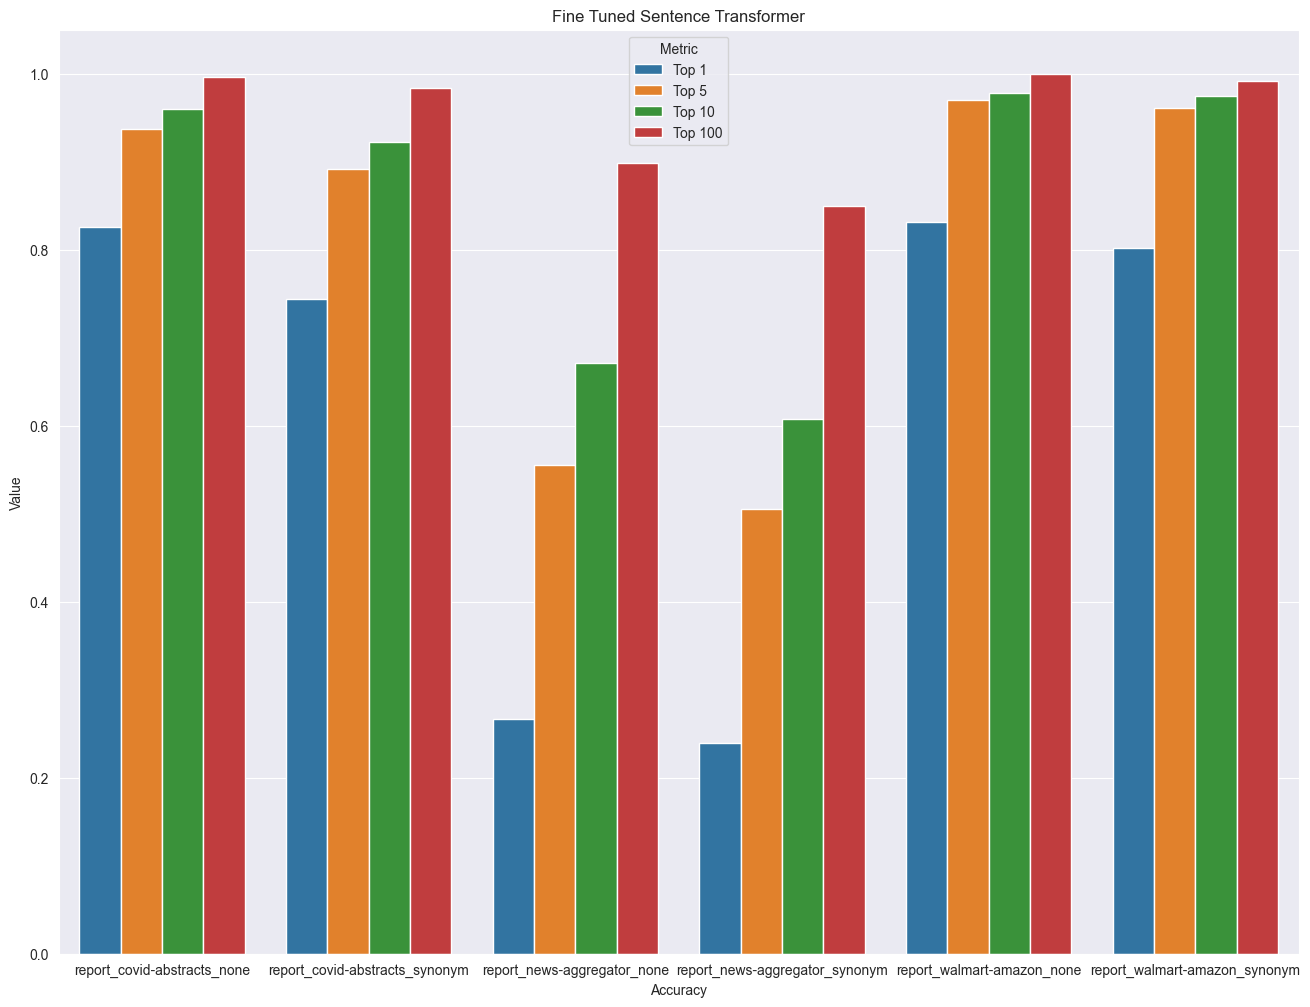

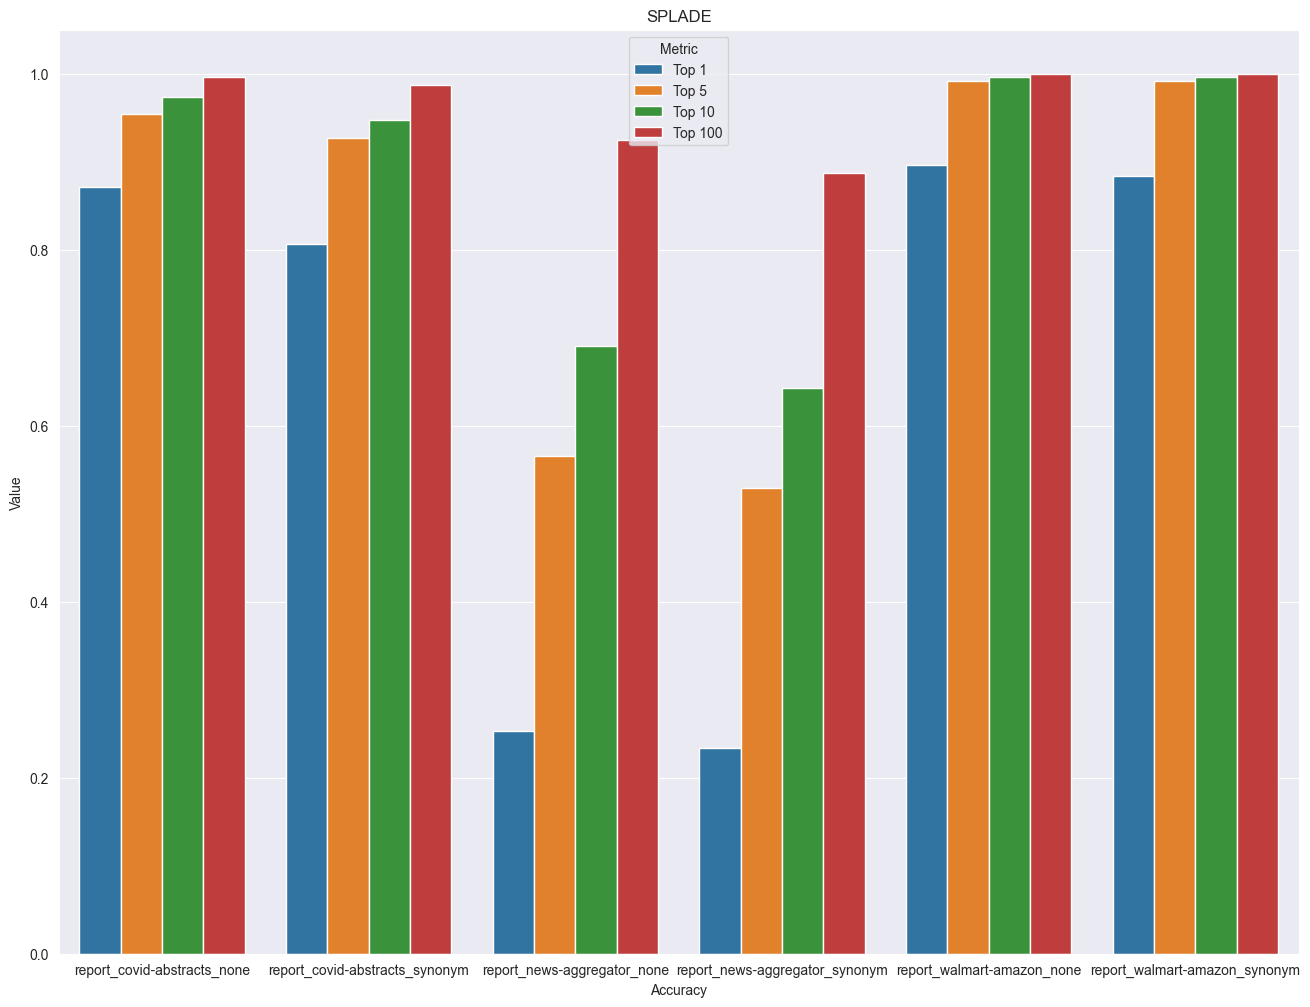

In [41]:
generate_plot_v1(df, "Words", "Bag of Words")
generate_plot_v1(df, "TF", "TF-IDF")
generate_plot_v1(df, "BM", "BM-25")
generate_plot_v1(df, "Sentence Transformer", "Sentence Transformer", True)
generate_plot_v1(df, "Fine", "Fine Tuned Sentence Transformer")
generate_plot_v1(df, "SPLADE", "SPLADE")

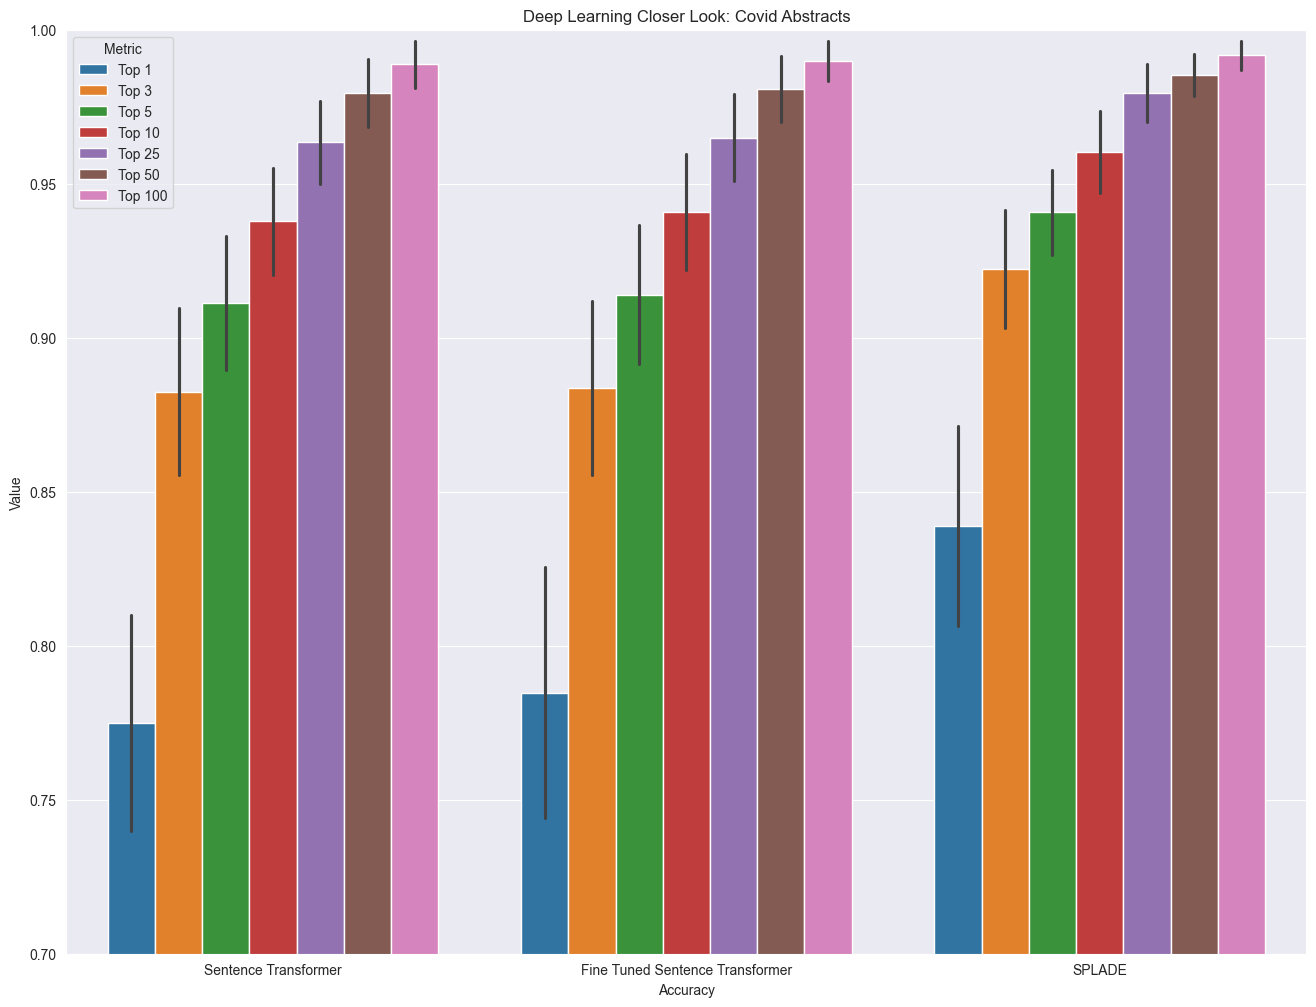

In [51]:
deep_list = ['Sentence Transformer', 'Fine Tuned Sentence Transformer', 'SPLADE']
pattern = '|'.join(deep_list)

df_closer = df[(df["Dataset"].str.contains("abstracts")) & (df["Model Name"].str.contains(pattern))]

barplot = sns.barplot(df_closer, x="Model Name", y="Value", hue="Metric")
plt.title("Deep Learning Closer Look: Covid Abstracts")
plt.xlabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()